In [36]:
# 2-6 recipe 13(regression)
import numpy as np
import tensorflow as tf

sess = tf.Session()

# 1. create data
np.random.seed(0)
x_vals = np.random.normal(1, 0.1, 100)
y_vals = np.repeat(10., 100)

# 2. initialize placeholder and variable
with tf.name_scope('X'):
    x_data = tf.placeholder(shape = [1], dtype = tf.float32)
with tf.name_scope('y'):
    y_target = tf.placeholder(shape = [1], dtype = tf.float32)
with tf.name_scope('A'):
    A = tf.Variable(tf.random_normal(shape = [1]))

# 3. create loss function    
my_output = tf.multiply(x_data, A)
with tf.name_scope('loss'):
    loss = tf.square(my_output - y_target)

# 4. define optimize algorizum
with tf.name_scope('train'):
    my_opt = tf.train.GradientDescentOptimizer(learning_rate = 0.02)
    train_step = my_opt.minimize(loss)

with tf.name_scope('summary'):       
    tf.summary.scalar('loss', loss)
    merged = tf.summary.merge_all()
    writer = tf.summary.FileWriter('./logs', sess.graph)

init = tf.global_variables_initializer()
sess.run(init)

# 5. update variable
for i in range(100):
    rand_index = np.random.choice(100)
    rand_x = [x_vals[rand_index]]
    rand_y = [y_vals[rand_index]]
    sess.run(train_step, feed_dict = {x_data: rand_x, y_target: rand_y})
    if (i+1)%25 == 0:
        print('Step #' + str(i+1) + ' A = ' + str(sess.run(A)))
        print('Loss = ' + str(sess.run(loss,
                                      feed_dict = {x_data: rand_x, y_target: rand_y})))

Step #25 A = [6.889238]
Loss = [2.4553556]
Step #50 A = [8.829845]
Loss = [0.01619662]
Step #75 A = [9.462237]
Loss = [0.7516288]
Step #100 A = [9.777159]
Loss = [1.4732467]


In [22]:
# 2-6 recipe 13(classification)
from tensorflow.python.framework import ops
ops.reset_default_graph()

sess = tf.Session()

x_vals = np.concatenate((np.random.normal(-1, 1, 50),
                        np.random.normal(3, 1, 50)))
y_vals = np.concatenate((np.repeat(0., 50), np.repeat(1., 50)))
x_data = tf.placeholder(shape = [1], dtype = tf.float32)
y_target = tf.placeholder(shape = [1], dtype = tf.float32)
A = tf.Variable(tf.random_normal(mean = 10, shape = [1]))

my_output = tf.add(x_data, A)
my_output_expanded = tf.expand_dims(my_output, 0)
y_target_expanded = tf.expand_dims(y_target, 0)

init = tf.global_variables_initializer()
sess.run(init)

xentropy = tf.nn.sigmoid_cross_entropy_with_logits(
    logits = my_output_expanded, labels = y_target_expanded)

my_opt = tf.train.GradientDescentOptimizer(0.05)
train_step = my_opt.minimize(xentropy)

for i in range(1400):
    rand_index = np.random.choice(100)
    rand_x = [x_vals[rand_index]]
    rand_y = [y_vals[rand_index]]
    
    sess.run(train_step, feed_dict = {x_data: rand_x, y_target: rand_y})
    if (i+1)%200 == 0:
        print('Step #' + str(i+1) + ' A = ' + str(sess.run(A)))
        print('Loss = ' + str(sess.run(xentropy,
                        feed_dict = {x_data: rand_x, y_target: rand_y})))


100
Step #200 A = [4.6476583]
Loss = [[0.0003117]]
Step #400 A = [0.7761615]
Loss = [[1.0980574]]
Step #600 A = [-0.40513375]
Loss = [[0.65750104]]
Step #800 A = [-0.8723292]
Loss = [[0.07302868]]
Step #1000 A = [-0.87438697]
Loss = [[0.10419324]]
Step #1200 A = [-1.0701089]
Loss = [[0.3305917]]
Step #1400 A = [-1.1084675]
Loss = [[0.2868583]]


Step #5 A = [[1.1956587]]
Loss = 78.72331
Step #10 A = [[2.8051617]]
Loss = 51.98814
Step #15 A = [[4.127047]]
Loss = 32.368034
Step #20 A = [[5.20044]]
Loss = 23.429523
Step #25 A = [[6.0783463]]
Loss = 15.791987
Step #30 A = [[6.7889585]]
Loss = 9.472044
Step #35 A = [[7.3645587]]
Loss = 6.7766237
Step #40 A = [[7.85904]]
Loss = 6.2762995
Step #45 A = [[8.252534]]
Loss = 3.6327064
Step #50 A = [[8.590739]]
Loss = 3.776984
Step #55 A = [[8.818898]]
Loss = 1.4895141
Step #60 A = [[9.0418005]]
Loss = 2.5470467
Step #65 A = [[9.220038]]
Loss = 2.320767
Step #70 A = [[9.385519]]
Loss = 1.5681422
Step #75 A = [[9.494866]]
Loss = 1.2988682
Step #80 A = [[9.594241]]
Loss = 1.4011785
Step #85 A = [[9.661892]]
Loss = 1.3840768
Step #90 A = [[9.73427]]
Loss = 0.768338
Step #95 A = [[9.7892685]]
Loss = 0.91428244
Step #100 A = [[9.835322]]
Loss = 0.57491696
Step #5 A = [2.0626562]
Loss = 61.644615
Step #10 A = [3.55632]
Loss = 42.986774
Step #15 A = [4.7247376]
Loss = 26.72792
Step #20 A = [5.67

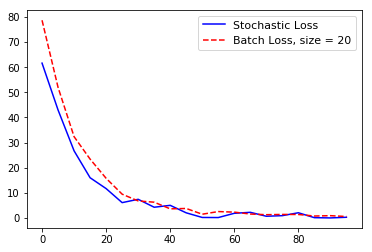

In [39]:
# 2-7 recipe 14
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

# batch training
ops.reset_default_graph()
sess = tf.Session()

batch_size = 20

x_vals = np.random.normal(1, 0.1, 100)
y_vals = np.repeat(10., 100)
x_data = tf.placeholder(shape = [None, 1], dtype = tf.float32)
y_target = tf.placeholder(shape = [None, 1], dtype = tf.float32)
A = tf.Variable(tf.random_normal(shape = [1, 1]))

my_output = tf.matmul(x_data, A)
loss = tf.reduce_mean(tf.square(my_output - y_target))

init = tf.global_variables_initializer()
sess.run(init)

my_opt = tf.train.GradientDescentOptimizer(0.02)
train_step = my_opt.minimize(loss)

# update variable by using batch training
loss_batch = []
for i in range(100):
    rand_index = np.random.choice(100, size = batch_size)
    rand_x = np.transpose([x_vals[rand_index]])
    rand_y = np.transpose([y_vals[rand_index]])
    sess.run(train_step, feed_dict = {x_data: rand_x, y_target: rand_y})
    if (i+1)%5 == 0:
        print('Step #' + str(i+1) + ' A = ' + str(sess.run(A)))
        temp_loss = sess.run(loss,
                            feed_dict = {x_data: rand_x, y_target: rand_y})
        print('Loss = ' + str(temp_loss))
        loss_batch.append(temp_loss)

# stochastic training
tf.reset_default_graph()
sess = tf.Session()

batch_size = 20

x_vals = np.random.normal(1, 0.1, 100)
y_vals = np.repeat(10., 100)
x_data = tf.placeholder(shape = [1], dtype = tf.float32)
y_target = tf.placeholder(shape = [1], dtype = tf.float32)
A = tf.Variable(tf.random_normal(shape = [1]))

my_output = tf.multiply(x_data, A)
loss = tf.reduce_mean(tf.square(my_output - y_target))

init = tf.global_variables_initializer()
sess.run(init)

my_opt = tf.train.GradientDescentOptimizer(0.02)
train_step = my_opt.minimize(loss)
        
# update variable by using stochastic training
loss_stochastic = []
for i in range(100):
    rand_index = np.random.choice(100)
    rand_x = [x_vals[rand_index]]
    rand_y = [y_vals[rand_index]]
    sess.run(train_step, feed_dict = {x_data: rand_x, y_target: rand_y})
    if (i+1)%5 == 0:
        print('Step #' + str(i+1) + ' A = ' + str(sess.run(A)))
        temp_loss = sess.run(loss,
                            feed_dict = {x_data: rand_x, y_target: rand_y})
        print('Loss = ' + str(temp_loss))
        loss_stochastic.append(temp_loss)
        
plt.plot(range(0, 100, 5), loss_stochastic, 'b-', label='Stochastic Loss')
plt.plot(range(0, 100, 5), loss_batch, 'r--', label='Batch Loss, size = 20')
plt.legend(loc='upper right', prop={'size': 11})
plt.show()

Step #200 A = [[8.710993]], b = [[-3.452221]]
Step #400 A = [[10.198804]], b = [[-4.6948075]]
Step #600 A = [[11.152791]], b = [[-5.506455]]
Step #800 A = [[11.8993635]], b = [[-5.9653687]]
Step #1000 A = [[12.450954]], b = [[-6.348896]]


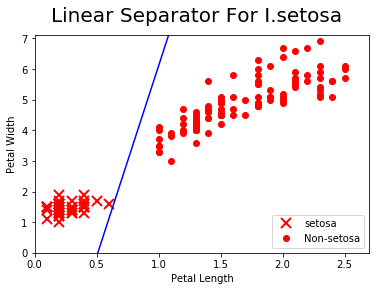

In [59]:
# 2-8 recipe 15
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets
import tensorflow as tf

ops.reset_default_graph()
sess = tf.Session()

iris = datasets.load_iris()
binary_target = np.array([1. if x == 0 else 0. for x in iris.target])

iris_2d = np.array([[x[2], x[3]] for x in iris.data])

batch_size = 20

# initialize placeholder and variable 
x1_data = tf.placeholder(shape=[None, 1], dtype = tf.float32)
x2_data = tf.placeholder(shape=[None, 1], dtype = tf.float32)
y_target = tf.placeholder(shape=[None, 1], dtype = tf.float32)

A = tf.Variable(tf.random_normal(shape = [1, 1]))
b = tf.Variable(tf.random_normal(shape = [1, 1]))

# define model(x1 = x2 * A + b)
my_mult = tf.matmul(x2_data, A)
my_add = tf.add(my_mult, b)
my_output = tf.subtract(x1_data, my_add)

# define loss function
xentropy = tf.nn.sigmoid_cross_entropy_with_logits(logits = my_output, labels = y_target)

# define optimize algorizum
my_opt = tf.train.GradientDescentOptimizer(0.05)
train_step = my_opt.minimize(xentropy)

# initialize
init = tf.global_variables_initializer()
sess.run(init)

# update variable
for i in range(1000):
    rand_index = np.random.choice(len(iris_2d), size = batch_size)
    rand_x = iris_2d[rand_index]
    rand_x1 = np.array([[x[0]] for x in rand_x])
    rand_x2 = np.array([[x[1]] for x in rand_x])
    rand_y = np.array([[y] for y in binary_target[rand_index]])
    sess.run(train_step, feed_dict={x1_data: rand_x1,
                                   x2_data: rand_x2,
                                   y_target: rand_y})
    if (i+1)%200 == 0:
        print('Step #' + str(i+1) + ' A = ' + str(sess.run(A)) + ', b = ' + str(sess.run(b)))
        
# extract variable
[[slope]] = sess.run(A)
[[intercept]] = sess.run(b)

x = np.linspace(0, 3, num = 50)
ablineValues = []
for i in x:
    ablineValues.append(slope * i + intercept)

# plot
setosa_x = [a[1] for i, a in enumerate(iris_2d) if binary_target[i] == 1]
setosa_y = [a[0] for i, a in enumerate(iris_2d) if binary_target[i] == 1]
non_setosa_x = [a[1] for i, a in enumerate(iris_2d) if binary_target[i] == 0]
non_setosa_y = [a[0] for i, a in enumerate(iris_2d) if binary_target[i] == 0]
plt.plot(setosa_x, setosa_y, 'rx', ms = 10, mew = 2, label = 'setosa')
plt.plot(non_setosa_x, non_setosa_y, 'ro', label = 'Non-setosa')
plt.plot(x, ablineValues, 'b-')
plt.xlim([0.0, 2.7])
plt.ylim([0.0, 7.1])
plt.suptitle('Linear Separator For I.setosa', fontsize = 20)
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.legend(loc = 'lower right')
plt.show()

In [63]:
# 2-9 recipe 16
# regression
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

ops.reset_default_graph()
sess = tf.Session()
batch_size = 25

x_vals = np.random.normal(1, 0.1, 100)
y_vals = np.repeat(10., 100)
x_data = tf.placeholder(shape=[None, 1], dtype=tf.float32)
y_target = tf.placeholder(shape=[None, 1], dtype=tf.float32)

train_indices = np.random.choice(len(x_vals), round(len(x_vals)*0.8), replace=False)
test_indices = np.array(list(set(range(len(x_vals))) - set(train_indices)))
x_vals_train = x_vals[train_indices]
x_vals_test = x_vals[test_indices]
y_vals_train = y_vals[train_indices]
y_vals_test = y_vals[test_indices]

A = tf.Variable(tf.random_normal(shape=[1,1]))

# define model
my_output = tf.matmul(x_data, A)

# define loss function
loss = tf.reduce_mean(tf.square(my_output - y_target))

# define optimize algorizum
my_opt = tf.train.GradientDescentOptimizer(0.02)
train_step = my_opt.minimize(loss)

# initalize
init = tf.global_variables_initializer()
sess.run(init)

# update variable
for i in range(100):
    rand_index = np.random.choice(len(x_vals_train), size = batch_size)
    rand_x = np.transpose([x_vals_train[rand_index]])
    rand_y = np.transpose([y_vals_train[rand_index]])
    sess.run(train_step, feed_dict={x_data: rand_x, y_target: rand_y})
    if (i+1)%25 == 0:
        print('Step #' + str(i+1) + ' A = ' + str(sess.run(A)))
        print('Loss = ' + str(sess.run(loss,
                                      feed_dict={x_data: rand_x, y_target: rand_y})))

mse_train = sess.run(loss, feed_dict = {x_data: np.transpose([x_vals_train]),
                                      y_target: np.transpose([y_vals_train])})
mse_test = sess.run(loss, feed_dict = {x_data: np.transpose([x_vals_test]),
                                      y_target: np.transpose([y_vals_test])})
print('MSE on train:' + str(np.round(mse_train, 2)))
print('MSE on test:' + str(np.round(mse_test, 2)))

Step #25 A = [[6.174741]]
Loss = 14.940412
Step #50 A = [[8.579614]]
Loss = 4.0539217
Step #75 A = [[9.392818]]
Loss = 1.5660758
Step #100 A = [[9.671007]]
Loss = 0.8150275
MSE on train:1.24
MSE on test:0.55


Step #200 A = [4.7017603]
Loss = 2.2775834
Step #400 A = [0.87603223]
Loss = 0.5038035
Step #600 A = [-0.23285514]
Loss = 0.23087627
Step #800 A = [-0.5225451]
Loss = 0.41737327
Step #1000 A = [-0.5421736]
Loss = 0.3094329
Step #1200 A = [-0.6019695]
Loss = 0.30523264
Step #1400 A = [-0.59417707]
Loss = 0.2779413
Step #1600 A = [-0.5695276]
Loss = 0.3158163
Step #1800 A = [-0.56891364]
Loss = 0.30111024
Accuracy on train set: 0.95
Accuracy on test set: 0.9


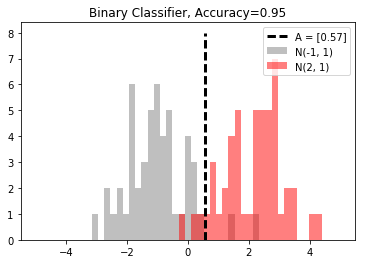

In [70]:
# classification
from tensorflow.python.framework import ops
ops.reset_default_graph()
sess = tf.Session()
batch_size = 25

x_vals = np.concatenate((np.random.normal(-1, 1, 50),
                        np.random.normal(2, 1, 50)))
y_vals = np.concatenate((np.repeat(0., 50), np.repeat(1., 50)))
x_data = tf.placeholder(shape=[1, None], dtype=tf.float32)
y_target = tf.placeholder(shape=[1, None], dtype=tf.float32)

train_indices = np.random.choice(len(x_vals), round(len(x_vals)*0.8),
                                replace=False)
test_indices = np.array(list(set(range(len(x_vals))) - set(train_indices)))
x_vals_train = x_vals[train_indices]
x_vals_test = x_vals[test_indices]
y_vals_train = y_vals[train_indices]
y_vals_test = y_vals[test_indices]
A = tf.Variable(tf.random_normal(mean=10, shape=[1]))

my_output = tf.add(x_data, A)

xentropy = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(
           logits=my_output, labels=y_target))

my_opt = tf.train.GradientDescentOptimizer(0.05)
train_step = my_opt.minimize(xentropy)

init = tf.global_variables_initializer()
sess.run(init)

for i in range(1800):
    rand_index = np.random.choice(len(x_vals_train), size=batch_size)
    rand_x = [x_vals_train[rand_index]]
    rand_y = [y_vals_train[rand_index]]
    sess.run(train_step, feed_dict={x_data: rand_x, y_target: rand_y})
    if (i+1)%200==0:
        print('Step #' + str(i+1) + ' A = ' + str(sess.run(A)))
        print('Loss = ' + str(sess.run(xentropy,
                              feed_dict={x_data: rand_x, y_target: rand_y})))
        
y_prediction = tf.squeeze(tf.round(tf.nn.sigmoid(tf.add(x_data, A))))
correct_prediction = tf.equal(y_prediction, y_target)
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
acc_value_train = sess.run(accuracy,
                         feed_dict={x_data: [x_vals_train], y_target: [y_vals_train]})
acc_value_test = sess.run(accuracy,
                         feed_dict={x_data: [x_vals_test], y_target: [y_vals_test]})
print('Accuracy on train set: ' + str(acc_value_train))
print('Accuracy on test set: ' + str(acc_value_test))

A_result = -sess.run(A)
bins = np.linspace(-5, 5, 50)
plt.hist(x_vals[0:50], bins, alpha=0.5, label='N(-1, 1)', color='gray')
plt.hist(x_vals[50:100], bins, alpha=0.5, label='N(2, 1)', color='red')
plt.plot((A_result, A_result), (0, 8), 'k--', linewidth=3,
        label='A = ' + str(np.round(A_result, 2)))
plt.legend(loc='upper right')
plt.title('Binary Classifier, Accuracy=' + str(np.round(acc_value_train, 2)))
plt.show()